In [1]:
import sympy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Number of points per coordinate

In [2]:
n_points_y = 22
n_points_x = 22

# Construct the necessary matrices

In [3]:
x, y = sympy.symbols("x y")
f = sympy.Float(2)
f_numeric = sympy.lambdify([x, y], f)

In [4]:
split_y = np.linspace(-np.pi / 2, np.pi / 2, n_points_y)
split_x = np.linspace(-np.pi / 2, np.pi / 2, n_points_x)
grid_x, grid_y = np.meshgrid(split_y, split_x, indexing="ij")

In [5]:
h_1 = split_x[1] - split_x[0]
h_2 = split_y[1] - split_y[0]

In [6]:
weights = np.array([
[1/12, 1/12, 0],
[1/12, 1/2, 1/12],
[0, 1/12, 1/12],
])

In [7]:
b = np.zeros(n_points_x*n_points_y)
matrix = np.zeros((n_points_x*n_points_y, n_points_x*n_points_y), dtype=np.float32)

for i in range(n_points_x*n_points_y):
    idx = np.unravel_index(i, (n_points_y, n_points_x))

    # Dirichlet boundary conditions
    if idx[0] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[0] == n_points_y - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[1] == 0:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue
    if idx[1] == n_points_x - 1:
        matrix[i] *= 0
        matrix[i, i] = 1
        b[i] = 0
        continue

    matrix[i, i] = 4 * (1 / h_1**2 + 1 / h_2**2)
    matrix[i, i + 1] = -2 / h_1**2
    matrix[i, i - 1] = -2 / h_1**2
    matrix[i, i + n_points_x] = -2 / h_2**2
    matrix[i, i - n_points_x] = -2 / h_2**2
        
    slice_0 = slice(idx[0]-1,idx[0]+2)
    slice_1 = slice(idx[1]-1,idx[1]+2)
    
    b[i] = -2 * (f_numeric(grid_x[slice_0, slice_1], grid_y[slice_0, slice_1]) * weights).sum()

# Solve the system of linear equations

In [8]:
C = np.linalg.solve(matrix, b)
C = C.reshape(n_points_y, n_points_x)

# Visualisation

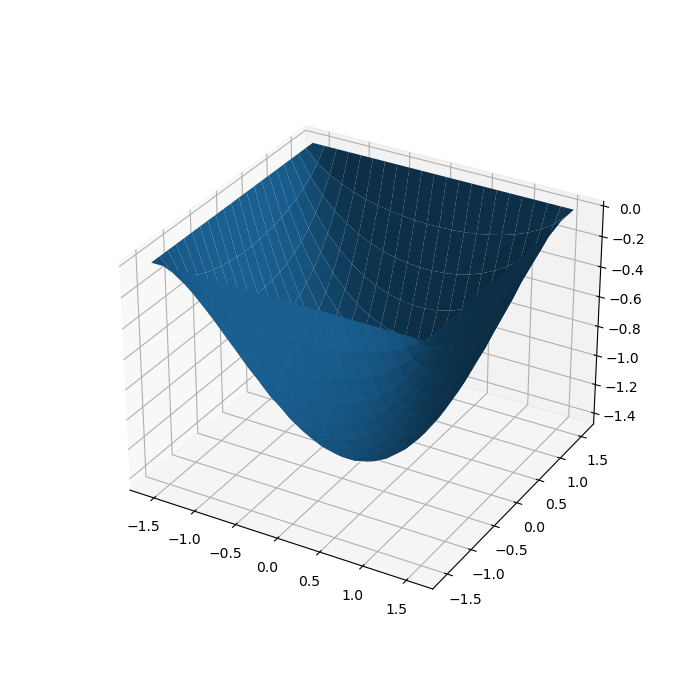

In [9]:
%matplotlib widget
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.plot_surface(grid_x, grid_y, C)
plt.show()

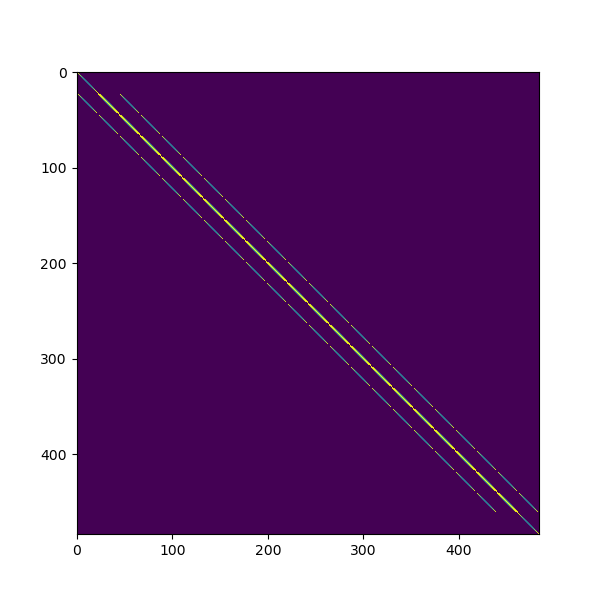

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(matrix != 0)
plt.show()